# Problem Statement
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Description of dataset

Variable	                                                  Description
Loan_ID	                                                  Unique Loan ID
Gender	                                                  Male/ Female
Married	                                                  Applicant married (Y/N)
Dependents	                                              Number of dependents
Education	                                              Applicant Education (Graduate/Under Graduate)
Self_Employed	                                          Self employed (Y/N)
ApplicantIncome	                                          Applicant income
CoapplicantIncome	                                      Coapplicant income
LoanAmount	                                              Loan amount in thousands
Loan_Amount_Term	                                      Term of loan in months
Credit_History	                                          Credit history meets guidelines
Property_Area	                                          Urban/ Semi Urban/ Rural
Loan_Status	                                              Loan approved (Y/N)

We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

In [75]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
#reading train and test dataset
train= pd.read_csv('train_ctrUa4K.csv')
test= pd.read_csv('test_lAUu6dG.csv')

In [77]:
#creating a copy of train set and viewing it
train_original= train.copy()
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [78]:
#creating a copy of test set and viewing it
test_original= test.copy()
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [79]:
#statistical description of train dataset
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002226,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [80]:
#printing datatypes of dataset
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [81]:
#info of train set to chk missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# Analyzing target variable

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


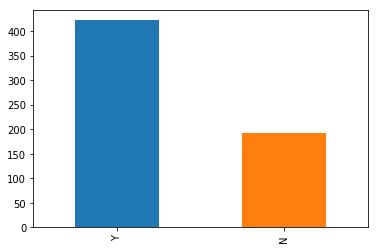

In [82]:
print(train.Loan_Status.value_counts())
print(train.Loan_Status.value_counts(normalize=True)) #prints proportions of class
train.Loan_Status.value_counts().plot.bar()

# Analyzing each independant variable

In [83]:
len(train.Loan_ID.unique())
# loan id is a unique id for each customer 

614

Male      489
Female    112
Name: Gender, dtype: int64


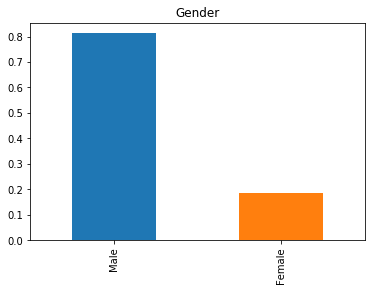

In [84]:
print(train.Gender.value_counts())
train.Gender.value_counts(normalize=True).plot.bar(title='Gender')

Yes    398
No     213
Name: Married, dtype: int64


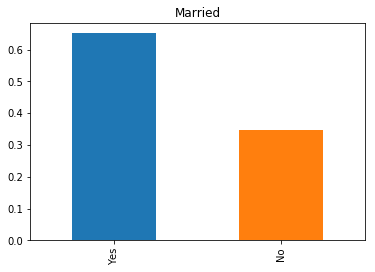

In [85]:
print(train.Married.value_counts())
train.Married.value_counts(normalize=True).plot.bar(title='Married')

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


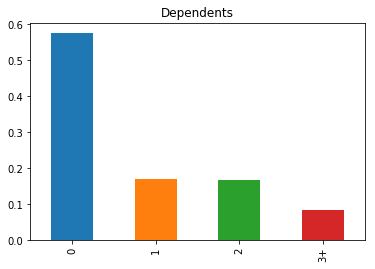

In [86]:
print(train.Dependents.value_counts())
train.Dependents.value_counts(normalize=True).plot.bar(title='Dependents')

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


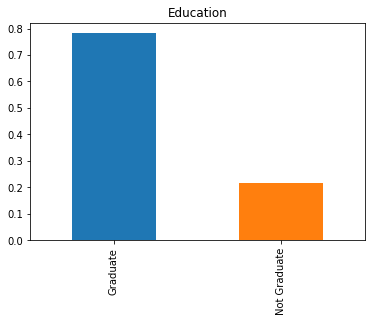

In [87]:
print(train.Education.value_counts())
train.Education.value_counts(normalize=True).plot.bar(title='Education')

No     500
Yes     82
Name: Self_Employed, dtype: int64


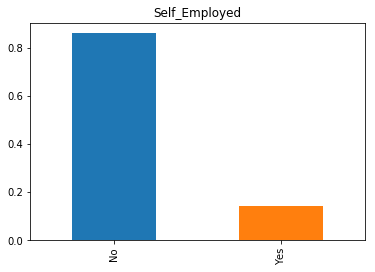

In [88]:
print(train.Self_Employed.value_counts())
train.Self_Employed.value_counts(normalize=True).plot.bar(title='Self_Employed')

1.0    475
0.0     89
Name: Credit_History, dtype: int64


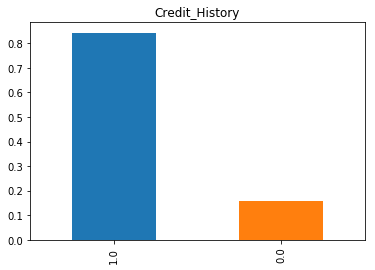

In [89]:
print(train.Credit_History.value_counts())
train.Credit_History.value_counts(normalize=True).plot.bar(title='Credit_History')

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


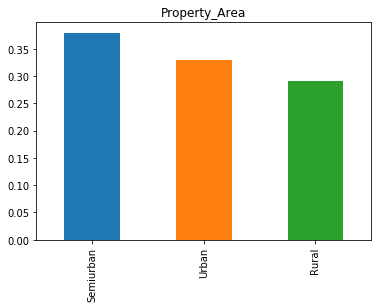

In [90]:
print(train.Property_Area.value_counts())
train.Property_Area.value_counts(normalize=True).plot.bar(title='Property_Area')

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


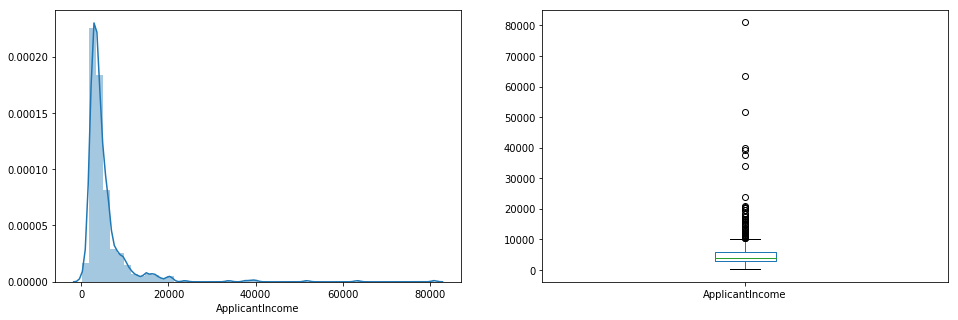

In [91]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. 

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


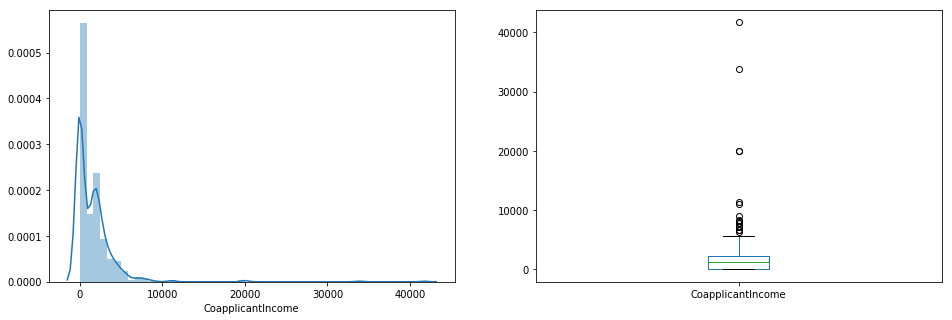

In [92]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


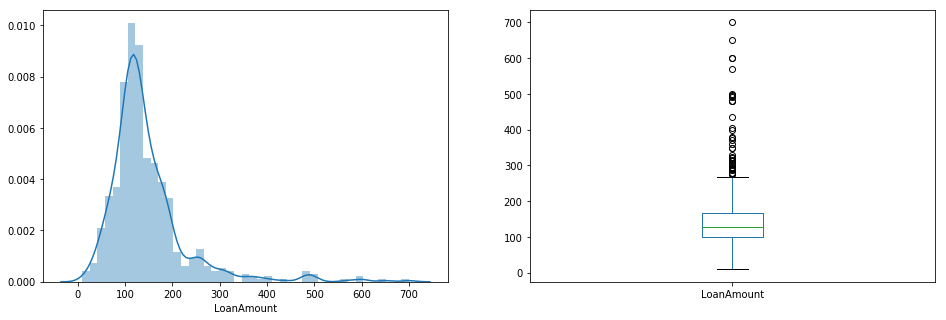

In [93]:
plt.figure(1)
plt.subplot(121) 
df=train['LoanAmount'].dropna(axis=0)# for numerical variables we need to ommit nan values before plotting graphs
sns.distplot(df); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. 

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


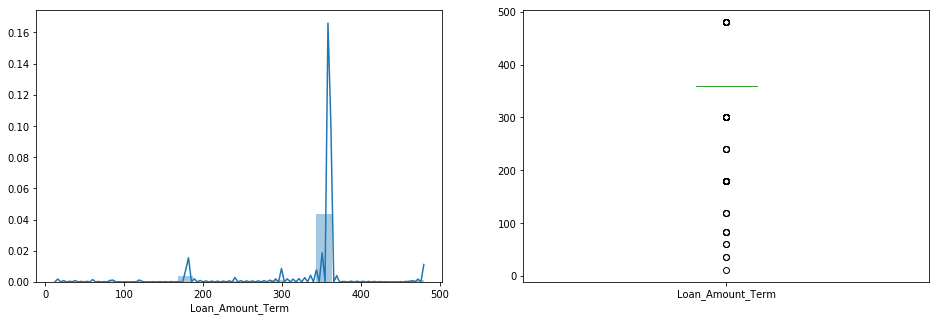

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


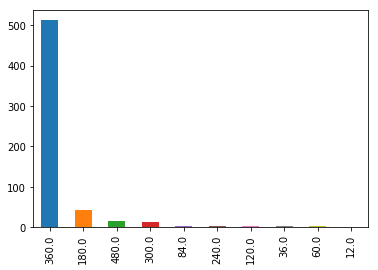

In [94]:
plt.figure(1)
plt.subplot(121) 
df=train['Loan_Amount_Term'].dropna(axis=0)# for numerical variables we need to ommit nan values before plotting graphs
sns.distplot(df); 
plt.subplot(122)
train['Loan_Amount_Term'].plot.box(figsize=(16,5)) 
plt.show()

print(train.Loan_Amount_Term.unique())
train.Loan_Amount_Term.value_counts().plot.bar()

# Analyzing each variable with Target variable

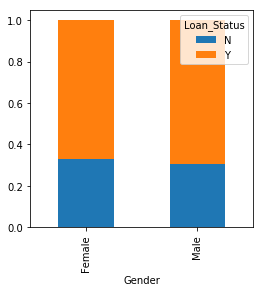

In [95]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
#It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

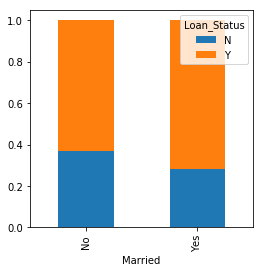

In [96]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
#

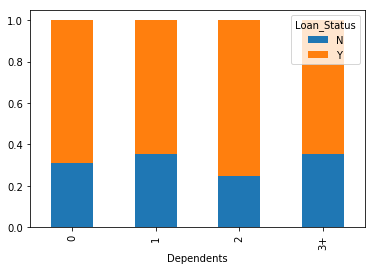

In [97]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
# 

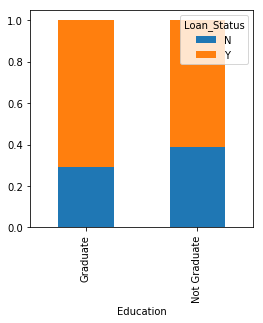

In [98]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
# 

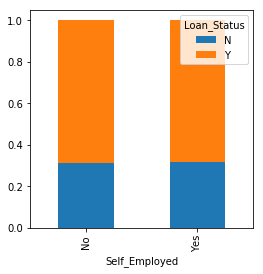

In [99]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
#

Proportion of married applicants is higher for the approved loans.
Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

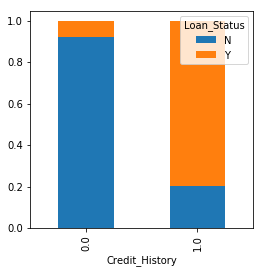

In [100]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 

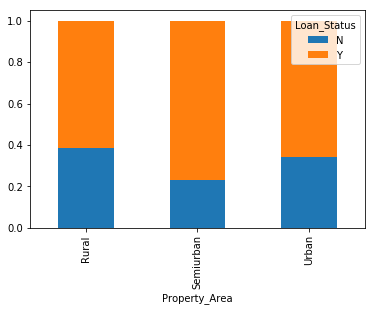

In [101]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

It seems people with credit history as 1 are more likely to get their loans approved.
Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

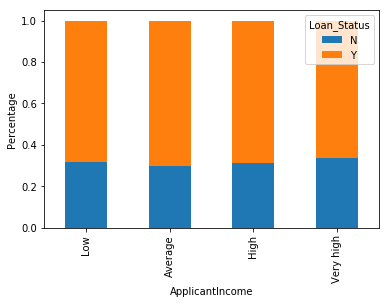

In [102]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')
#It can be inferred that Applicant income does not affect the chances of loan approval

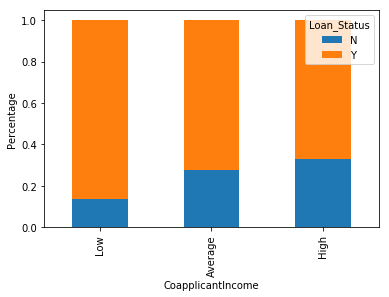

In [103]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')
#It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

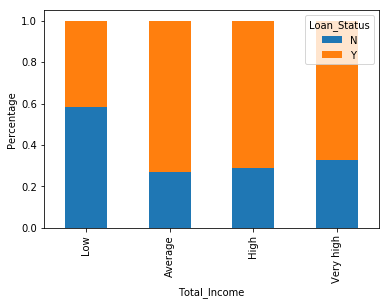

In [104]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')
#We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

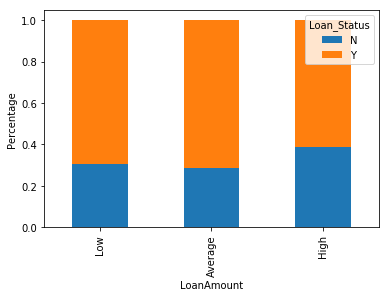

In [105]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')
#It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount

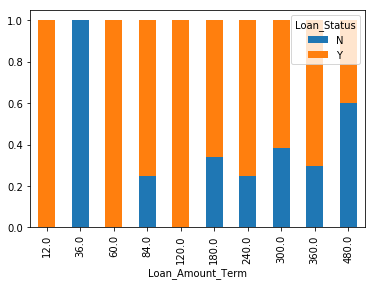

In [106]:
Loan_Amount_Term=pd.crosstab(train['Loan_Amount_Term'],train['Loan_Status']) 
Loan_Amount_Term.div(Loan_Amount_Term.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

In [107]:
#now remove the bins which were created for visualization
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


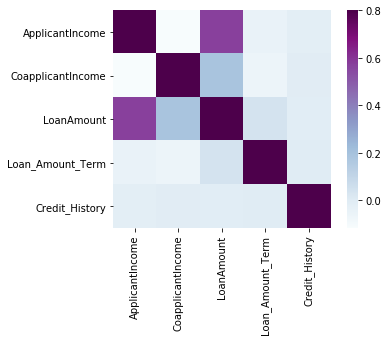

In [108]:
matrix = train.corr()
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
#We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

# Making changes to dataset (pre-processing)

In [109]:
#loan id
#dropping the Loan_ID variable as it do not have any effect on the loan status
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [110]:
#gender
train.Gender.isnull().sum()
test.Gender.isnull().sum()
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) #filling missing values with mode
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) # doing same thing with test dataset
train['Gender']= pd.get_dummies(train['Gender'])
test['Gender']= pd.get_dummies(test['Gender'])

In [111]:
#married
train.Married.isnull().sum() 
test.Married.isnull().sum() 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) #filling missing values with mode
test['Married'].fillna(train['Married'].mode()[0], inplace=True) # doing same thing with test dataset
train['Married']= pd.get_dummies(train['Married'])
test['Married']= pd.get_dummies(test['Married'])

In [112]:
#dependants
train.Dependents.isnull().sum() 
test.Dependents.isnull().sum() 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)

In [113]:
#education
train['Education']= pd.get_dummies(train['Education'])
test['Education']= pd.get_dummies(test['Education'])

In [114]:
#self_employed
train.Self_Employed.isnull().sum()
train.Self_Employed.isnull().sum()
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Self_Employed']= pd.get_dummies(train['Self_Employed'])
test['Self_Employed']= pd.get_dummies(test['Self_Employed'])

In [115]:
#application income
#nothing to be done

In [116]:
#CoapplicantIncome
#nothing to be done

In [117]:
#loan amount
test.LoanAmount.isnull().sum()
test.LoanAmount.isnull().sum()
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [118]:
#loan amount term
train.Loan_Amount_Term.isnull().sum()
test.Loan_Amount_Term.isnull().sum()
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 

In [119]:
#credit history
train.Credit_History.isnull().sum()
test.Credit_History.isnull().sum()
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 

In [120]:
#property area
train['Property_Area']= pd.get_dummies(train['Property_Area'])
test['Property_Area']= pd.get_dummies(test['Property_Area'])

In [121]:
#loan status
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

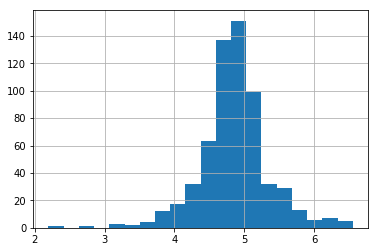

In [122]:
#loan amt contained a lot of outliers so we removed them
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])
#Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided

In [123]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,0,1,0,1,1,5849,0.0,128.0,360.0,1.0,0,1,4.852030
1,0,0,1,1,1,4583,1508.0,128.0,360.0,1.0,1,0,4.852030
2,0,0,0,1,0,3000,0.0,66.0,360.0,1.0,0,1,4.189655
3,0,0,0,0,1,2583,2358.0,120.0,360.0,1.0,0,1,4.787492
4,0,1,0,1,1,6000,0.0,141.0,360.0,1.0,0,1,4.948760


# Model Building

In [124]:
#forming target and independant variables
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [125]:
#splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
#Instead of creating validation set, we can also make use of cross validation to validate our predictions.we will do it later

In [126]:
#applying logistic regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
#predicting values
pred_cv = model.predict(x_cv)

In [128]:
#calculating accuracy of cv
accuracy_score(y_cv,pred_cv)

0.8054054054054054

In [129]:
#predictions of test data
pred_test = model.predict(test)

In [130]:
#reading file containing correct values of loan status of test set
target_test=pd.read_csv('sample_submission_49d68Cx.csv')
target_test

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
5,LP001054,N
6,LP001055,N
7,LP001056,N
8,LP001059,N
9,LP001067,N


In [131]:
#creating dummies
target_test['Loan_Status']=pd.get_dummies(target_test['Loan_Status'])

In [132]:
#calculating accuracy of test data
accuracy_score(target_test['Loan_Status'],pred_test)

0.8365122615803815

In [133]:
#applying k fold cv
from sklearn.model_selection import StratifiedKFold

i=1
s=[]
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]    
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)    
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)   
    s.append(score)
    i+=1
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]
print(sum(s)/5)


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164
0.8110523532522474


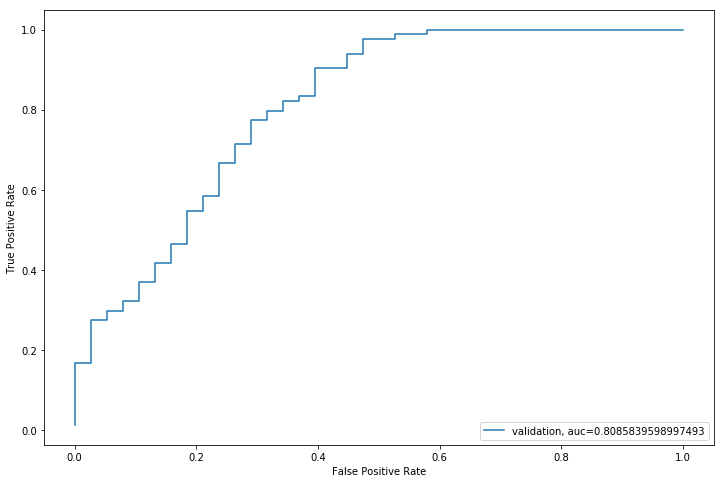

In [134]:
#visualizing roc curve
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(loc=4) 
plt.show()

#We got an auc value of 0.81

# Applying Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier

i=1 
s=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)    
    s.append(score)
    i+=1 
    pred_test = model.predict(test)
print(sum(s)/5)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d



1 of kfold 5
accuracy_score 0.7903225806451613

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7295081967213115

4 of kfold 5
accuracy_score 0.7622950819672131

5 of kfold 5
accuracy_score 0.819672131147541
0.7832628239026971


We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters.

In [136]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [137]:
# Estimating the optimized value 
grid_search.best_estimator_
    #So, the optimized value for the max_depth variable is 5 and for n_estimator is 141

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=141, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [138]:
#let’s build the model using these optimized values.
i=1 
s=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)    
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)
    s.append(score)
    i+=1 
    pred_test = model.predict(test) 
    pred2=model.predict_proba(test)[:,1]
print(sum(s)/5)


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164
0.8094130089899524


# Feature importance

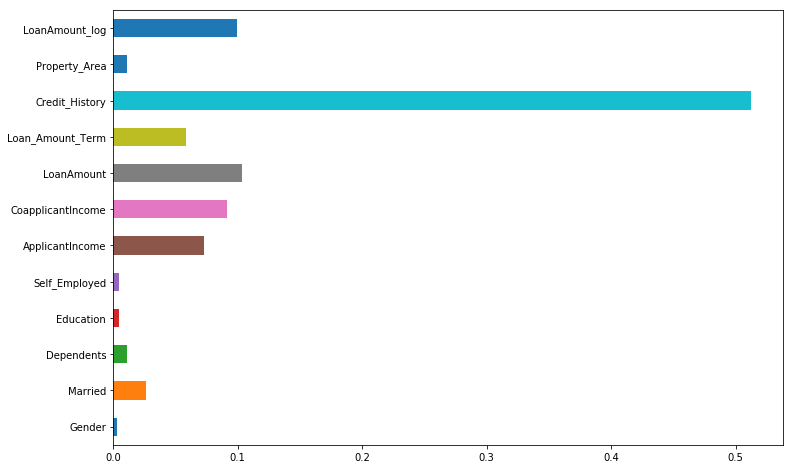

In [139]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))
#We can see that Credit_History is the most important feature. So, feature engineering helped us in predicting our target variable.